# Комп'ютерне моделювання задач прикладної математики

## Дифузія невзаємодіючих частинок. Рівняння Ланжевена

###  Лабораторна робота 1

***Студентка Пороскун Олена. Група ПМ.м-21***

*Task 3* 

In [1]:
from matplotlib import pyplot as plt

In [2]:
import random
import numpy as np
import math
import time

In [3]:
def ksi():
    max_num = 2147483647
    p1 = random.randint(0, max_num) / (max_num+1)
    p2 = random.randint(0, max_num) / (max_num+1)
    if (p1==0):
        p1 = 1e-10
    if (p2==0):
        p2 = 1e-10
    return math.sqrt(-2*math.log(p1)) * math.sin(2*math.pi*p2)

#ksi()

Функція, що розраховує координати частинок, час за який кожна з них перетне другий локальний мінімум та середній час по всім частинкам.

In [4]:
def funct3(a=1, D=1):

    t = 0                  # початковий момент часу
    dt = 0.002             # крок по часу 
    
    N = 1000                # кількість точок(частинок)  
    
    # потенціал V = a*x^4 - x^2
    # f(x) = - dV/dx = -(4a*x^3 - 2*x) = 2*x - 4a*x^3
    # x_n = x_n-1 + f(x_n-1)*dt + sqrt(D*dt)*ksi()
    
    # локальні мінімуми з р-ня f(x) = - dV/dx = 0: x_1 = 0, x_2,3 = +- 1/sqrt(2*a)
    minimum0 = 0
    minimum1 = -1/math.sqrt(2*a)
    minimum2 = -minimum1
    
    # початкові координати точок кладемо в локальний мінімум (той що зліва = -1/sqrt(2*a))
    x = [minimum1 for i in range(N)]
    
    # час для кожної частинки коли вона перетне другий мінімум
    times = np.zeros(N)              
    
    # mean pasage time (середній час виходу за межі другого мінімуму)
    mpt = 0
    
    for i in range(np.size(x)):
        t=0
        while((x[i]) <= minimum2):
            f =  2*x[i] - 4*a*(x[i]**3)
            x[i] += f*dt + math.sqrt(D*dt)*ksi()
            if (x[i] > minimum2):
                times[i] = t
            t += dt    
    mpt = np.mean(times) 
    
    #print("a","\t D","\t mpt")
    print(a, "\t", D,"\t", mpt)
    
    return x, times, mpt   

#x0, times0, mpt0 = funct3(a=0.5, D=1)

* *Розрахуємо дані для a = [ 0.5, 1, 1.5, 2 ], D = 1.*

In [5]:
start_time = time.time()

a = [0.5, 1, 1.5, 2]
x = []             # координати частинок
t = []             # час для кожної частинки коли вона перетне другий локальний мінімум 
mpt = []           # mean pasage time (середній час виходу за межі другого мінімуму)

print("a","\t D","\t mpt")

for i in range(len(a)):
    x_, t_, mpt_ = funct3(a = a[i], D = 1)
    x.append(x_)
    t.append(t_)
    mpt.append(mpt_)
    
print("--- %s seconds ---" % (time.time() - start_time))  

a 	 D 	 mpt
0.5 	 1 	 7.32068399999995
1 	 1 	 3.2956019999998842
1.5 	 1 	 2.342891999999927
2 	 1 	 1.7222939999999518
--- 26.304203510284424 seconds ---


In [6]:
print(np.shape(x))
print(np.shape(t))
print(np.shape(mpt))

(4, 1000)
(4, 1000)
(4,)


* *Розрахуємо дані для a = 1, D = [ 0.5, 1, 1.5, 2 ].*

In [7]:
start_time = time.time()

a_new = 1
D_new = [0.5, 1, 1.5, 2]
x_new = []             # координати частинок
t_new = []             # час для кожної частинки коли вона перетне другий локальний мінімум 
mpt_new = []           # mean pasage time (середній час виходу за межі другого мінімуму)

print("a","\t D","\t mpt")

for i in range(len(a)):
    x_, t_, mpt_ = funct3(a = a_new, D = D_new[i])
    x_new.append(x_)
    t_new.append(t_)
    mpt_new.append(mpt_)
    
print("--- %s seconds ---" % (time.time() - start_time))  

a 	 D 	 mpt
1 	 0.5 	 7.152293999999871
1 	 1 	 3.4728659999998817
1 	 1.5 	 2.31681399999992
1 	 2 	 1.7712099999999604
--- 25.963239669799805 seconds ---


In [8]:
print(np.shape(x_new))
print(np.shape(t_new))
print(np.shape(mpt_new))

(4, 1000)
(4, 1000)
(4,)


* *Розрахуємо дані для a = 1, D = [ 0.75, 1.25, 1.75 ].*

In [9]:
start_time = time.time()

a_new2 = 1
D_new2 = [0.75, 1.25, 1.75]
x_new2 = []             # координати частинок
t_new2 = []             # час для кожної частинки коли вона перетне другий локальний мінімум 
mpt_new2 = []           # mean pasage time (середній час виходу за межі другого мінімуму)

print("a","\t D","\t mpt")

for i in range(len(D_new2)):
    x_, t_, mpt_ = funct3(a = a_new2, D = D_new2[i])
    x_new2.append(x_)
    t_new2.append(t_)
    mpt_new2.append(mpt_)
    
print("--- %s seconds ---" % (time.time() - start_time)) 

a 	 D 	 mpt
1 	 0.75 	 4.433153999999897
1 	 1.25 	 2.9295719999999026
1 	 1.75 	 2.052847999999939
--- 16.0100359916687 seconds ---


In [10]:
print(np.shape(x_new2))
print(np.shape(t_new2))
print(np.shape(mpt_new2))

(3, 1000)
(3, 1000)
(3,)


Функція, що априксимує дані, повертає: \
  ~ coef - коефіцієнти рівняння, яке відповідає початковим даним, \
  ~ polinom - рівняння з коефіцієнтами, \
  ~ mpt_to_compare - значення функції для порівняння зі початковими 

In [11]:
def fun_aprox(X, mpt):

    k=1
    mpt_new = mpt*0
    eps = 1000
    
    bool_mpt = 0
    
    while ((bool_mpt < np.size(mpt)) & (eps >= 0.00001) & (k<10)):
        
        coef = np.polyfit(X, mpt,k)
        polinom = np.poly1d(coef)
        mpt_to_compare = polinom(X)
        
        mpt_old = np.round(mpt,5)
        mpt_to_compare = np.round(mpt_to_compare,5)
        
        eps = abs(mpt_old[0] - mpt_to_compare[0])
        
        bool_mpt = np.sum(mpt_old == mpt_to_compare)
        
        #print("\n k =",k)
        #print("coef:", coef)
        #print("y = aprox(x):\n",polinom)
        #print("Перевiрка:\n", " X =", X, "\n mpt =    ", mpt_old,"\n mpt_to_compare =", mpt_to_compare)
        #print("bool_mpt =",bool_mpt)
        #print("eps =",eps)
        
        k += 1
        
    print("X:", X)   
    print("coef:", coef)
    print("y = aprox(x) :\n",polinom)
    print("Перевiрка:\n", " X =", X, "\n", mpt_old, "= mpt\n",mpt_to_compare,"= mpt_to_compare", "\n")
    
    return coef, polinom, mpt_to_compare

#c0, p0,mpt_to_compare0 =  fun_aprox(D, mpt)

Побудуємо тепер початкові дані та знайдену криву.

* Графік для a = [ 0.5, 1, 1.5, 2 ], D = 1.

X: [0.5, 1, 1.5, 2]
coef: [ -3.65368   17.105784 -27.3149    17.158398]
y = aprox(x) :
         3         2
-3.654 x + 17.11 x - 27.31 x + 17.16
Перевiрка:
  X = [0.5, 1, 1.5, 2] 
 [7.32068 3.2956  2.34289 1.72229] = mpt
 [7.32068 3.2956  2.34289 1.72229] = mpt_to_compare 



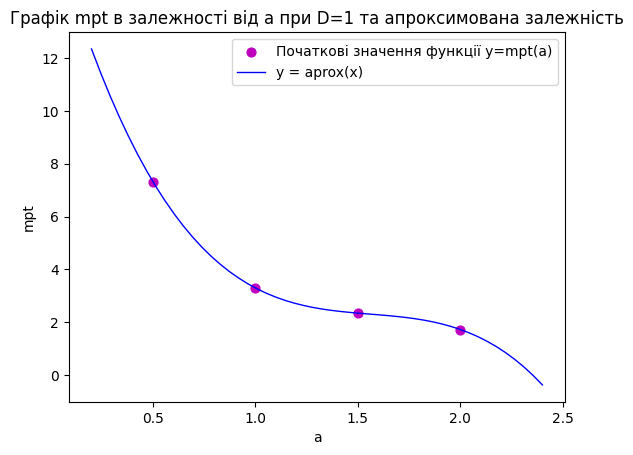

In [12]:
def fun_plot31(mpt, a = [0.5, 1, 1.5, 2], D = 1): 
    
    plt.scatter(a, mpt, label="Початковi значення функції y=mpt(a)", s=40, c='m') 
    
    coef, polinom, mpt_to_compare = fun_aprox(a, mpt)
    
    a_new = np.linspace(0.2, 2.4,50)
    mpt_new = polinom(a_new)
    plt.plot(a_new, mpt_new, label = "y = aprox(x)", linewidth = 1, c='b')
    
    plt.xlabel("a") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від a при D=" f'{D}' " та апроксимована залежність")
    plt.legend()
    
fun_plot31(mpt)

* Графік для a = 1, D = [ 0.5, 1, 1.5, 2 ].

X: [0.5, 1, 1.5, 2]
coef: [ -2.55057067  12.698464   -21.94305333  15.268026  ]
y = aprox(x) :
         3        2
-2.551 x + 12.7 x - 21.94 x + 15.27
Перевiрка:
  X = [0.5, 1, 1.5, 2] 
 [7.15229 3.47287 2.31681 1.77121] = mpt
 [7.15229 3.47287 2.31681 1.77121] = mpt_to_compare 



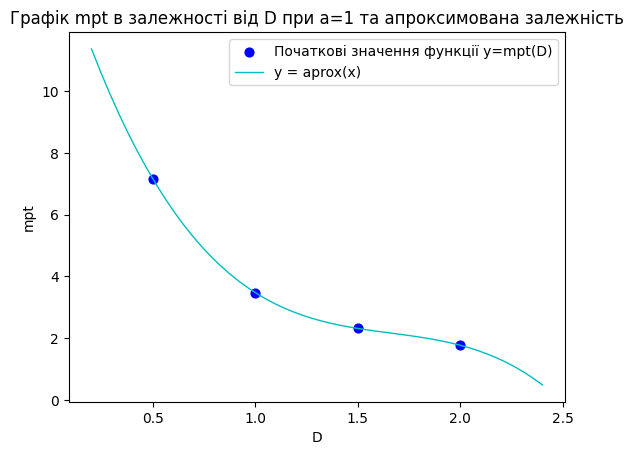

In [13]:
def fun_plot32(mpt, a = 1, D = [0.5, 1, 1.5, 2]): 
    
    plt.scatter(D, mpt, label="Початковi значення функції y=mpt(D)", s=40, c='b') 
    
    coef, polinom, mpt_to_compare = fun_aprox(D, mpt)
    
    D_new = np.linspace(0.2, 2.4,50)
    mpt_new = polinom(D_new)
    plt.plot(D_new, mpt_new, label = "y = aprox(x)", linewidth = 1, c='c')
    
    plt.xlabel("D") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від D при a=" f'{a}' " та апроксимована залежність")
    plt.legend()
    
fun_plot32(mpt_new)

* Графік для a = 1, D = [ 0.75, 1.25, 1.75 ].

X: [0.75, 1.25, 1.75]
coef: [ 1.253716   -5.514596    7.86388575]
y = aprox(x) :
        2
1.254 x - 5.515 x + 7.864
Перевiрка:
  X = [0.75, 1.25, 1.75] 
 [4.43315 2.92957 2.05285] = mpt
 [4.43315 2.92957 2.05285] = mpt_to_compare 



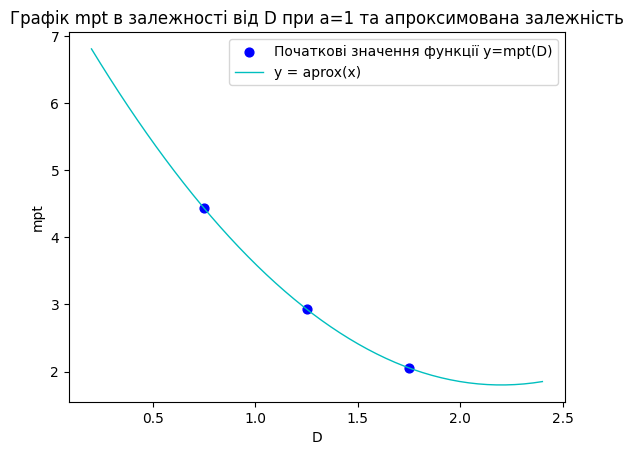

In [14]:
fun_plot32(mpt_new2, D=D_new2)

Побудуємо дані всіх 3 випадків на одному графіку. Потім спробуємо апроксимувати ці дані. На цьому ж графіку побудуємо апроксимовану криву.

In [15]:
import warnings
warnings.filterwarnings('ignore')

X: [0.5  1.   1.5  2.   0.5  1.   1.5  2.   0.75 1.25 1.75]
coef: [ -0.35730522   0.83303976   1.17417409  -1.31312152  -5.69733574
  -1.58847052  18.17375186   1.02523442 -27.72060756  18.85487443]
y = aprox(x) :
          9         8         7         6         5         4         3
-0.3573 x + 0.833 x + 1.174 x - 1.313 x - 5.697 x - 1.588 x + 18.17 x
          2
 + 1.025 x - 27.72 x + 18.85
Перевiрка:
  X = [0.5  1.   1.5  2.   0.5  1.   1.5  2.   0.75 1.25 1.75] 
 [7.32068 3.2956  2.34289 1.72229 7.15229 3.47287 2.31681 1.77121 4.43315
 2.92957 2.05285] = mpt
 [7.23649 3.38423 2.32985 1.74675 7.23649 3.38423 2.32985 1.74675 4.43315
 2.92957 2.05285] = mpt_to_compare 



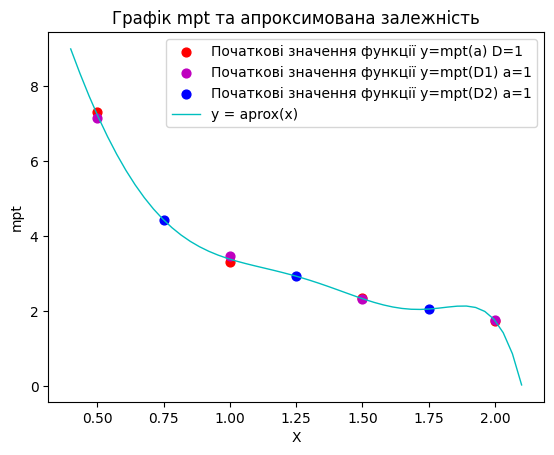

In [16]:
def fun_plot33(mpt, mpt1, mpt2): 
    
    # 1 частина 
    D_const = 1
    a = [0.5, 1, 1.5, 2]
    plt.scatter(a, mpt, label="Початковi значення функції y=mpt(a) D="f'{D_const}', s=40, c='r') 

    # 2 частина 
    a_const = 1
    D1 = [0.5, 1, 1.5, 2]
    plt.scatter(D1, mpt1, label="Початковi значення функції y=mpt(D1) a="f'{a_const}', s=40, c='m') 
    
    # 3 частина 
    D2 = [0.75, 1.25, 1.75]
    plt.scatter(D2, mpt2, label="Початковi значення функції y=mpt(D2) a="f'{a_const}', s=40, c='b') 
    
    X = np.hstack((a, D1, D2))
    y = np.hstack((mpt, mpt1, mpt2))

    x_apr = np.linspace(0.4, 2.1, 50)
    coef, polinom, mpt_to_compare = fun_aprox(X, y)
    mpt_new = polinom(x_apr)
    
    #plt.scatter(X, y, label="Початковi значення функції", s=200, c=[0.5, 0.5, 0.5, 0.3]) 
    plt.plot(x_apr, mpt_new, label = "y = aprox(x)", linewidth = 1, c='c')

    plt.xlabel("X") 
    plt.ylabel("mpt")
    plt.title("Графік mpt та апроксимована залежність")
    plt.legend()
    
fun_plot33(mpt, mpt_new, mpt_new2)

Побудуємо тепер дані у логарифмованих осях.

* Графік для a = [ 0.5, 1, 1.5, 2 ], D = 1.

X: [-0.69314718  0.          0.40546511  0.69314718]
coef: [-0.44095522  0.15525263 -0.83196524  1.19258885]
y = aprox(x) :
         3          2
-0.441 x + 0.1553 x - 0.832 x + 1.193
Перевiрка:
  X = [-0.69314718  0.          0.40546511  0.69314718] 
 [1.9907  1.19259 0.85139 0.54366] = mpt
 [1.9907  1.19259 0.85139 0.54366] = mpt_to_compare 



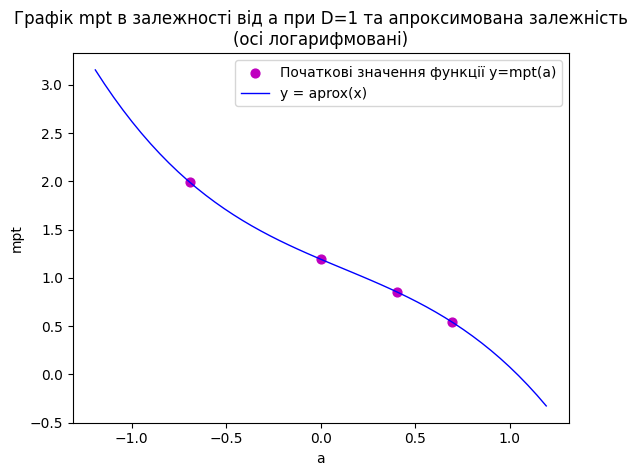

In [17]:
def fun_plot31_log(mpt, a = [0.5, 1, 1.5, 2], D = 1): 
    
    a = np.log(a)
    mpt = np.log(mpt)
    plt.scatter(a, mpt, label="Початковi значення функції y=mpt(a)", s=40, c='m') 
    
    coef, polinom, mpt_to_compare = fun_aprox(a, mpt)
    
    a_new = np.linspace(a[0]-0.5, a[len(a)-1]+0.5,50)
    mpt_new = polinom(a_new)
    plt.plot(a_new, mpt_new, label= "y = aprox(x)",linewidth = 1,c='b')
    
    plt.xlabel("a") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від a при D=" f'{D}' " та апроксимована залежність\n(осі логарифмовані)")
    plt.legend()
    
fun_plot31_log(mpt)  

* Графік для a = 1, D = [ 0.5, 1, 1.5, 2 ].

In [18]:
def fun_plot32_log(mpt, a = 1, D = [0.5, 1, 1.5, 2]): 
    
    D = np.log(D)
    mpt = np.log(mpt)
    plt.scatter(D, mpt, label="Початковi значення функції y=mpt(D)", s=40, c='b') 
    
    coef, polinom, mpt_to_compare = fun_aprox(D, mpt)
    
    D_new = np.linspace(D[0]-0.5, D[len(D)-1]+0.5,50)
    mpt_new = polinom(D_new)
    plt.plot(D_new, mpt_new, label= "y = aprox(x)",linewidth = 1,c='c')
    
    plt.xlabel("D") 
    plt.ylabel("mpt")
    plt.title("Графік mpt в залежності від D при a=" f'{a}' " та апроксимована залежність\n(осі логарифмовані)")
    plt.legend()
    
#fun_plot32_log(mpt_new)

X: [-0.69314718  0.          0.40546511  0.69314718]
coef: [ 0.03868396  0.05113475 -1.02542121  1.24498019]
y = aprox(x) :
          3           2
0.03868 x + 0.05113 x - 1.025 x + 1.245
Перевiрка:
  X = [-0.69314718  0.          0.40546511  0.69314718] 
 [1.96743 1.24498 0.84019 0.57166] = mpt
 [1.96743 1.24498 0.84019 0.57166] = mpt_to_compare 



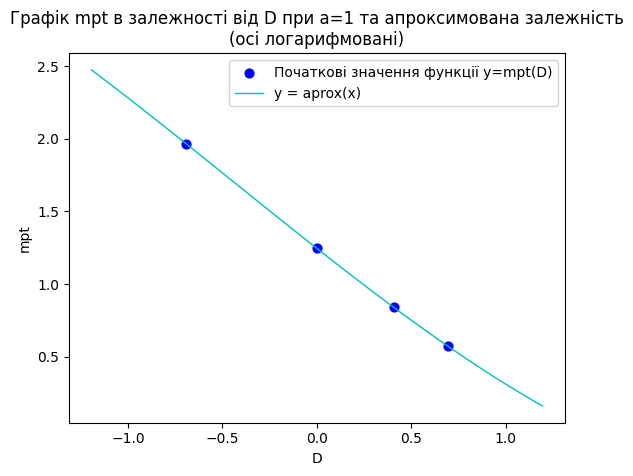

In [19]:
fun_plot32_log(mpt_new,  D = D_new)

* Графік для a = 1, D = [ 0.75, 1.25, 1.75 ].

X: [-0.28768207  0.22314355  0.55961579]
coef: [-0.29031125 -0.82968806  1.27445136]
y = aprox(x) :
          2
-0.2903 x - 0.8297 x + 1.274
Перевiрка:
  X = [-0.28768207  0.22314355  0.55961579] 
 [1.48911 1.07486 0.71923] = mpt
 [1.48911 1.07486 0.71923] = mpt_to_compare 



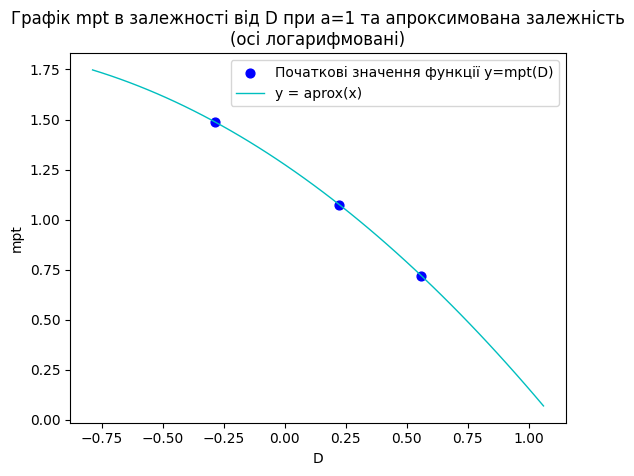

In [20]:
fun_plot32_log(mpt_new2, D = D_new2)  

Побудуємо гістограму з осями часу та частоти.

In [21]:
import seaborn as sns
import pandas as pd

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
def fun_histograma(time, a = 1, D = 1): 
    
    # Графік частоти та функції розподілу
    sns_plot = sns.distplot(time,label="a=" f'{a}')
    #sns.distplot(time, rug=True, hist=True, label="a=" f'{a}')

    # Графік тільки функції розподілу
    #snsplot = sns.kdeplot(time, shade=True,label="a=" f'{a}')
    #fig = snsplot.get_figure()
    
    plt.xlabel('time')
    plt.ylabel('frequency(P)')
    plt.title("Гістограма (D = " f'{D}'")")
    plt.legend()
    #plt.show()
    
#t0, a0 = t[0], a[0]
#fun_histograma(t0, a0)

In [24]:
t1, t2 = t[0], t[3]
a1, a2 = a[0], a[3]
D_ = 1
print("a1 =", a1, "\na2 =", a2, "\nD_ =", D_)

a1 = 0.5 
a2 = 2 
D_ = 1


Будуємо гістограми для даних з а=0.5 і а=2.

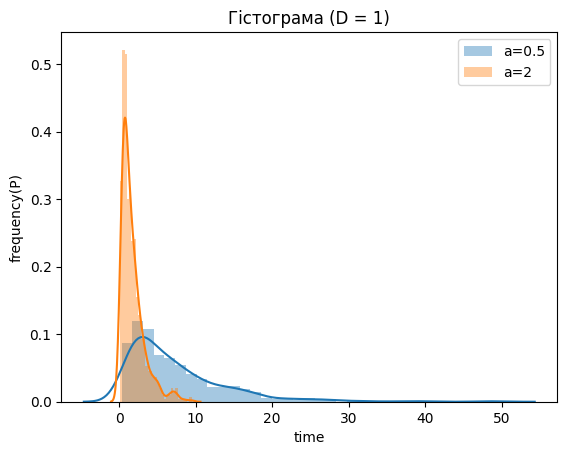

In [25]:
fun_histograma(t1, a1, D_)
fun_histograma(t2, a2, D_)

Будуємо гістограми для даних з а=0.5 і а=2 з логарифмованою оссю Х.

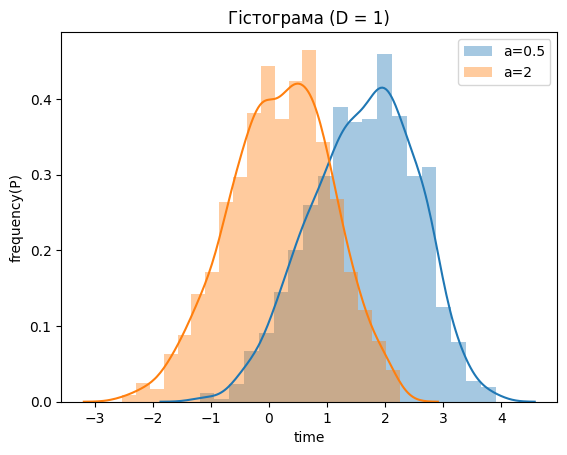

In [26]:
fun_histograma(np.log(t1), a1, D_)
fun_histograma(np.log(t2), a2, D_)

# ------------------------------------------------------------------------------------------------------------